# Read Input Data from Kaggle



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minfeishen","key":"7ed3293191e3b63c97dbfc0d352330fc"}'}

In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000          19905        341  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                          18950  2025-05-07 15:41:53.213000           2826         45  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid      Heart Attack Dataset                                     16250  2025-04-30 21:58:22.740000           3667         64  1.0              
ivankmk/thousan

In [ ]:
! kaggle competitions download -c playground-series-s5e4

In [ ]:
! mkdir train

In [ ]:
! unzip playground-series-s5e4.zip -d train

Archive:  playground-series-s5e4.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


# EDA

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:

train_df = pd.read_csv('train/train.csv')
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
test_df = pd.read_csv('train/test.csv')
test_df.info()
test_df.describe()
test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,28736
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,48832
Number_of_Ads,0


## Numerical exploration


In [ ]:
podcast_num = train_df["Podcast_Name"].nunique()
print(f"There are {podcast_num} podcast names in the train dataset.")

There are 48 podcast names in the train dataset.


In [ ]:
np.sum(~np.isin(test_df["Podcast_Name"].unique().tolist(), train_df["Podcast_Name"].unique().tolist()))

np.int64(0)

In [ ]:

print("Train Data: Number_of_Ads Frequency Table\n")
print(train_df["Number_of_Ads"].value_counts())
print("\n")
print("Test Data: Number_of_Ads Frequency Table\n")
print(test_df["Number_of_Ads"].value_counts())

Train Data: Number_of_Ads Frequency Table

Number_of_Ads
0.00      217592
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.00         1
103.91         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64


Test Data: Number_of_Ads Frequency Table

Number_of_Ads
0.00       72863
1.00       71015
3.00       53556
2.00       52564
89.12          1
2063.00        1
Name: count, dtype: int64


In [ ]:

print("Train Data: Host_Popularity_percentage Summary Statistics\n")
print(train_df["Host_Popularity_percentage"].describe())
print("\n")
print("Test Data: Host_Popularity_percentage Summary Statistics\n")
print(test_df["Host_Popularity_percentage"].describe())

Train Data: Host_Popularity_percentage Summary Statistics

count    750000.000000
mean         59.859901
std          22.873098
min           1.300000
25%          39.410000
50%          60.050000
75%          79.530000
max         119.460000
Name: Host_Popularity_percentage, dtype: float64


Test Data: Host_Popularity_percentage Summary Statistics

count    250000.000000
mean         59.716491
std          22.880028
min           2.490000
25%          39.250000
50%          59.900000
75%          79.390000
max         117.760000
Name: Host_Popularity_percentage, dtype: float64


In [ ]:

print("Train Data: Guest_Popularity_percentage Summary Statistics\n")
print(train_df["Guest_Popularity_percentage"].describe())
print("\n")
print("Test Data: Guest_Popularity_percentage Summary Statistics\n")
print(test_df["Guest_Popularity_percentage"].describe())

Train Data: Guest_Popularity_percentage Summary Statistics

count    603970.000000
mean         52.236449
std          28.451241
min           0.000000
25%          28.380000
50%          53.580000
75%          76.600000
max         119.910000
Name: Guest_Popularity_percentage, dtype: float64


Test Data: Guest_Popularity_percentage Summary Statistics

count    201168.000000
mean         52.192796
std          28.445034
min           0.000000
25%          28.320000
50%          53.360000
75%          76.560000
max         116.820000
Name: Guest_Popularity_percentage, dtype: float64


## Graphical Visualization

### Numerical Feature


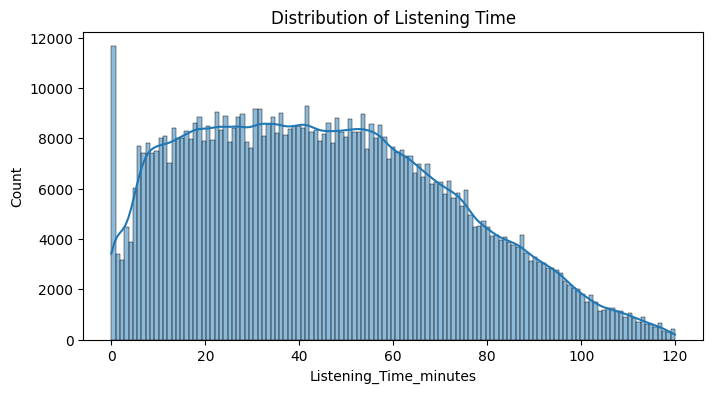

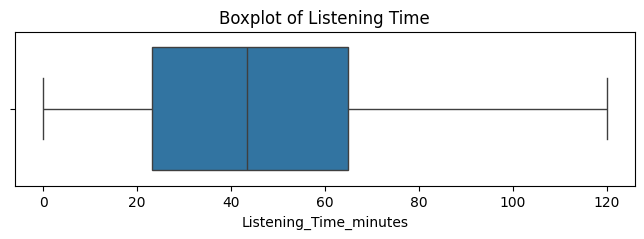

In [ ]:
#check for skewness/outlier


plt.figure(figsize=(8, 4))
sns.histplot(train_df['Listening_Time_minutes'], kde=True)
plt.title("Distribution of Listening Time")
plt.xlabel("Listening_Time_minutes")
plt.show()


plt.figure(figsize=(8, 2))
sns.boxplot(x=train_df['Listening_Time_minutes'])
plt.title("Boxplot of Listening Time")
plt.show()

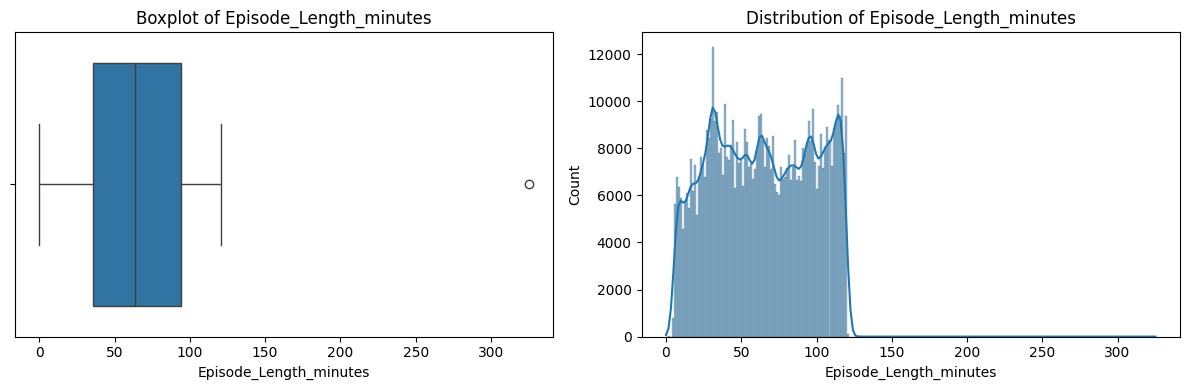

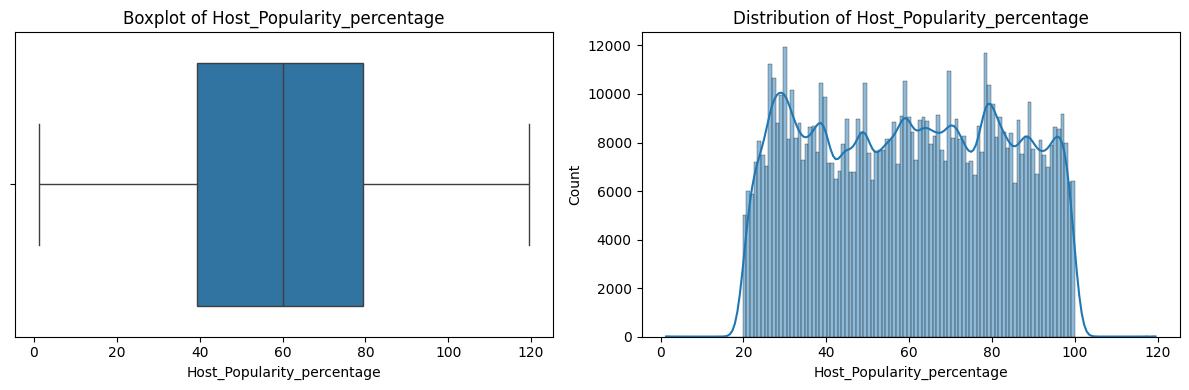

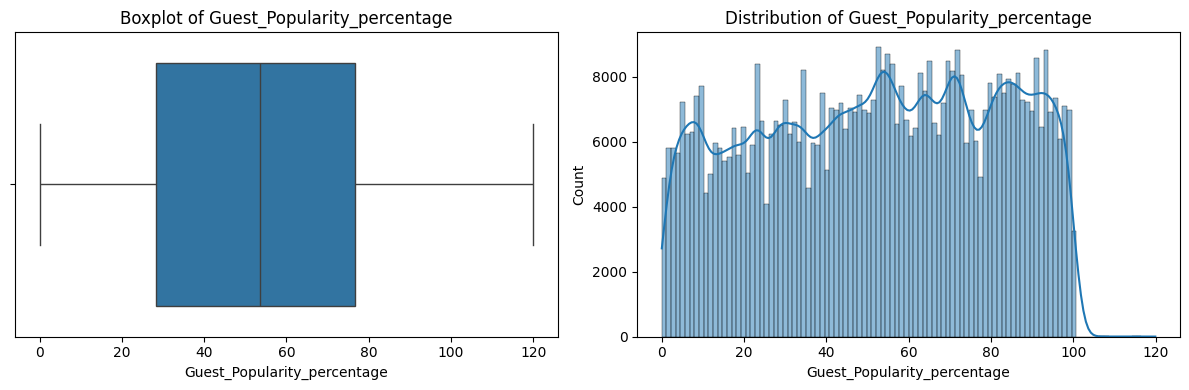

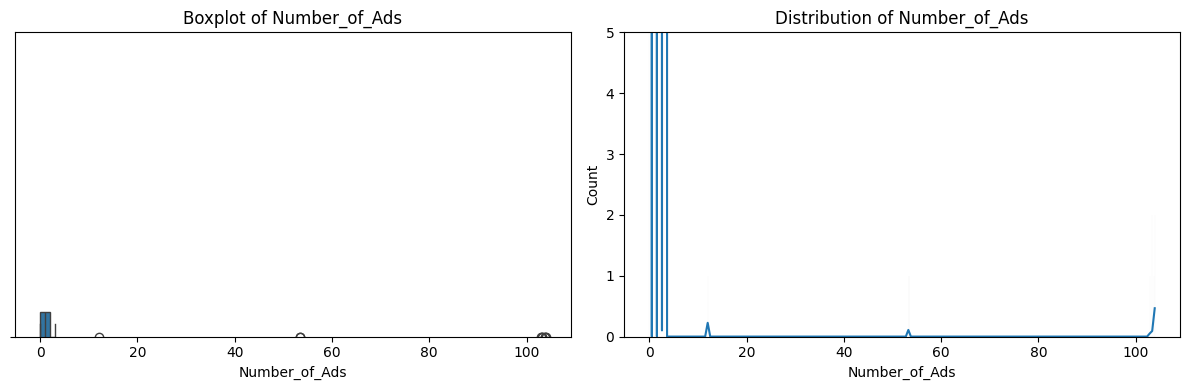

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns (adjust as needed)
numerical_cols = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]

# Loop through and generate boxplot + histplot for each
for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    if col == 'Number_of_Ads':
        plt.ylim(0, 5)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    if col == 'Number_of_Ads':
        plt.ylim(0, 5)

    plt.tight_layout()
    plt.show()

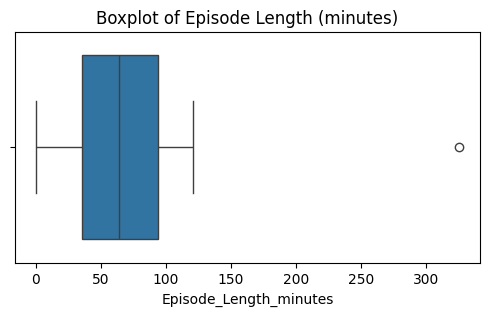

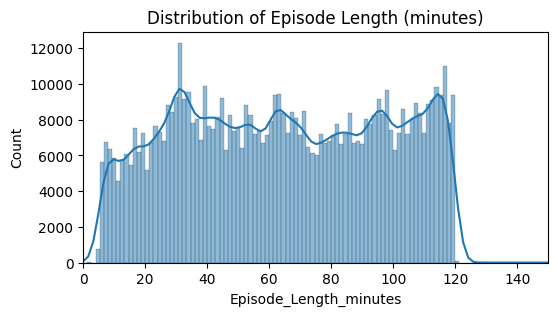

In [ ]:
# Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=train_df['Episode_Length_minutes'])
plt.title('Boxplot of Episode Length (minutes)')
plt.show()

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(train_df['Episode_Length_minutes'], kde=True)
plt.title('Distribution of Episode Length (minutes)')
plt.xlim(0, 150)
plt.show()


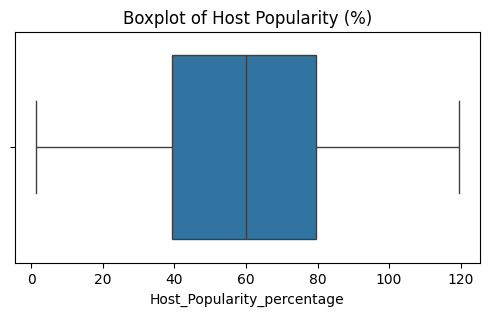

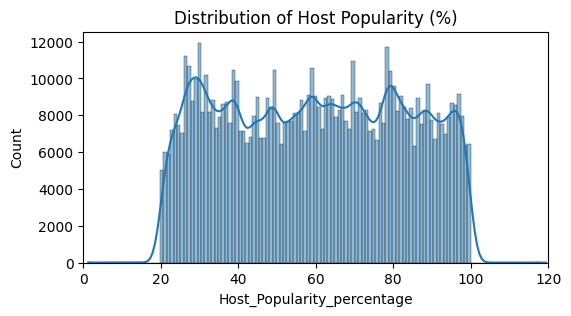

In [ ]:
# Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=train_df['Host_Popularity_percentage'])
plt.title('Boxplot of Host Popularity (%)')
plt.show()

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(train_df['Host_Popularity_percentage'], kde=True)
plt.title('Distribution of Host Popularity (%)')
plt.xlim(0, 120)
plt.show()

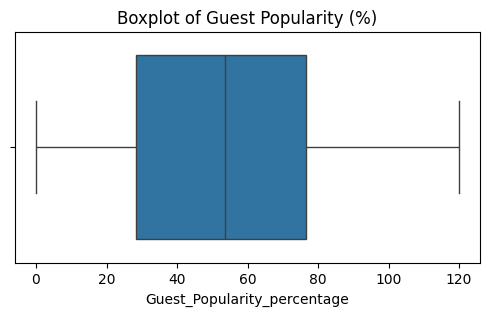

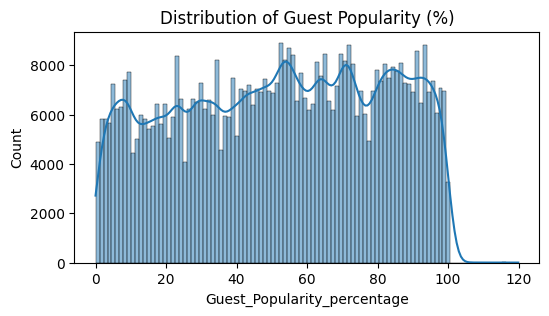

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=train_df['Guest_Popularity_percentage'])
plt.title('Boxplot of Guest Popularity (%)')
plt.show()

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(train_df['Guest_Popularity_percentage'], kde=True)
plt.title('Distribution of Guest Popularity (%)')
plt.show()

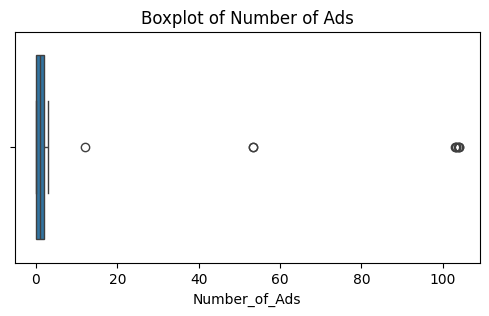

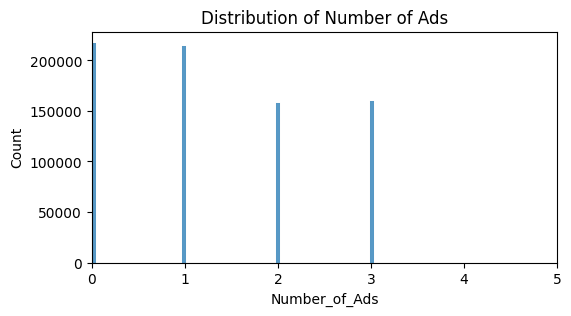

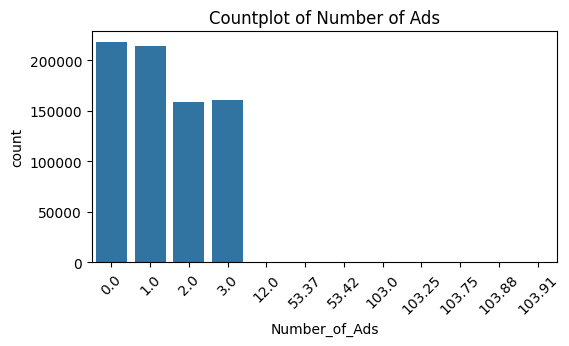

In [ ]:
# Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=train_df['Number_of_Ads'])
plt.title('Boxplot of Number of Ads')

plt.show()

# Histogram
plt.figure(figsize=(6, 3))
sns.histplot(train_df['Number_of_Ads'], kde=False)
plt.title('Distribution of Number of Ads')
plt.xlim(0, 5)
plt.show()

#countplot
plt.figure(figsize=(6, 3))
sns.countplot(x='Number_of_Ads', data=train_df)
plt.xticks(rotation=45)
plt.title('Countplot of Number of Ads')

plt.show()



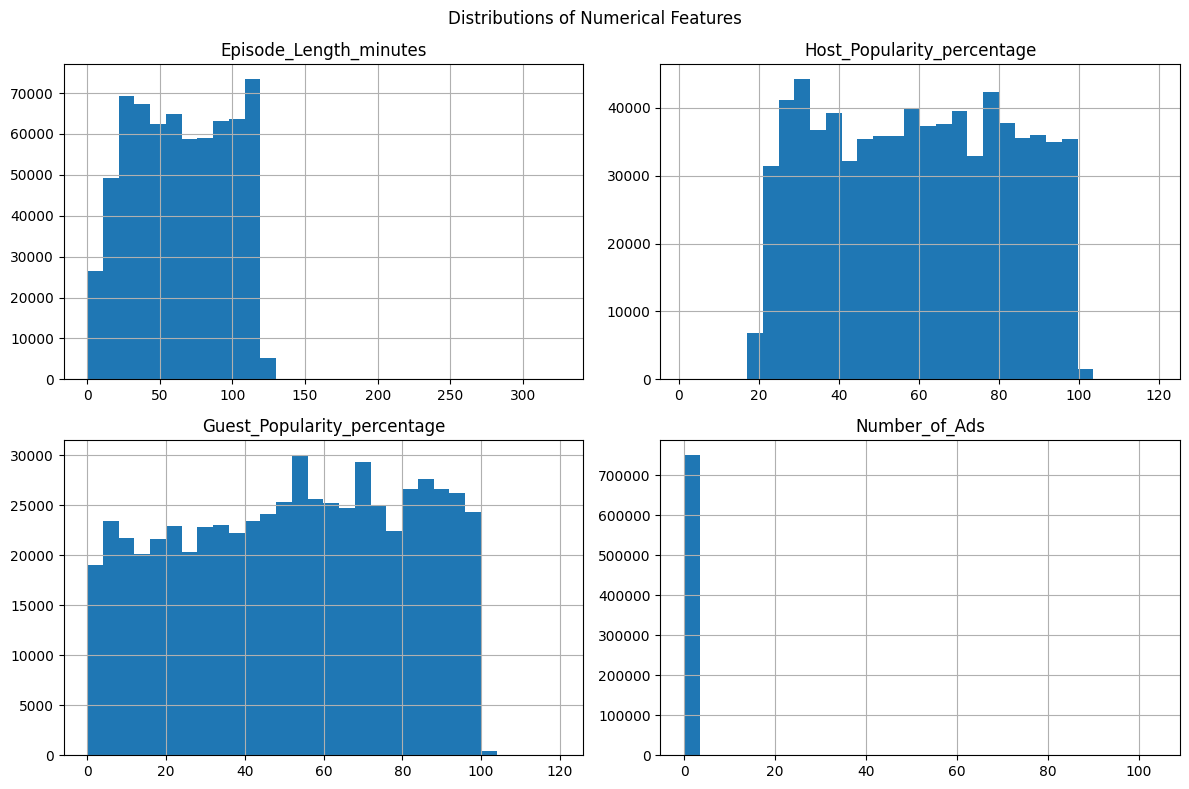

In [ ]:

numerical_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage',
                  'Guest_Popularity_percentage', 'Number_of_Ads']


train_df[numerical_cols].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()


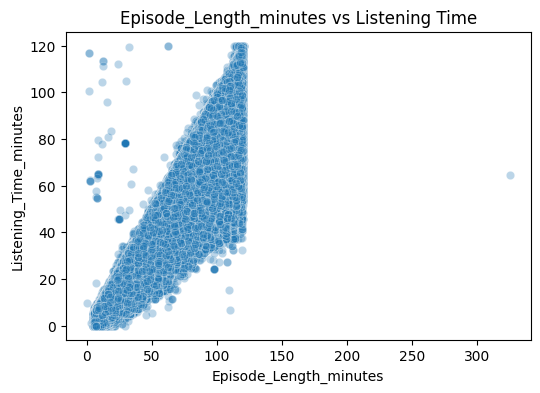

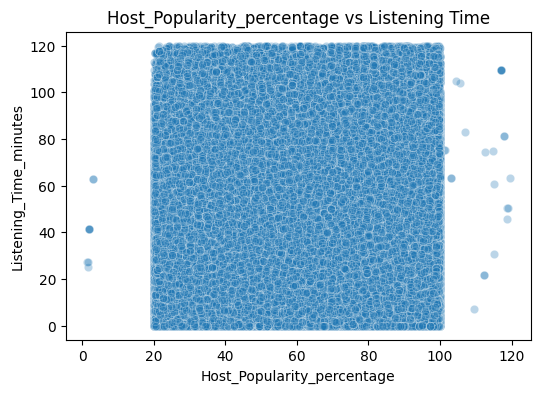

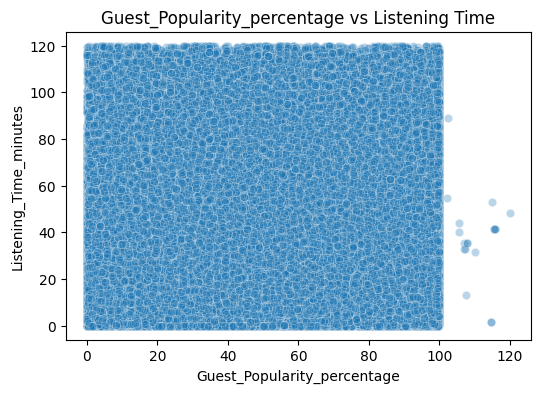

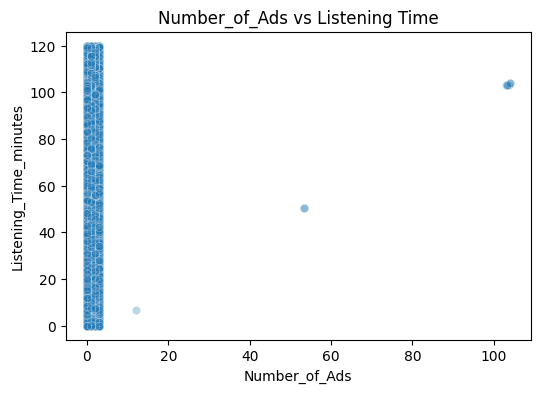

In [ ]:
#scatterplot
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage',
            'Guest_Popularity_percentage', 'Number_of_Ads']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_df, x=col, y='Listening_Time_minutes', alpha=0.3)
    plt.title(f"{col} vs Listening Time")
    plt.xlabel(col)
    plt.ylabel("Listening_Time_minutes")
    plt.show()


### Categorical Feature

In [ ]:
print(f"Episode_Title unique values: {train_df['Episode_Title'].nunique()}")
print(f"Podcast_Name unique values: {train_df['Podcast_Name'].nunique()}")
print(f"Number of unique genres: {train_df['Genre'].nunique()}")

Episode_Title unique values: 100
Podcast_Name unique values: 48
Number of unique genres: 10


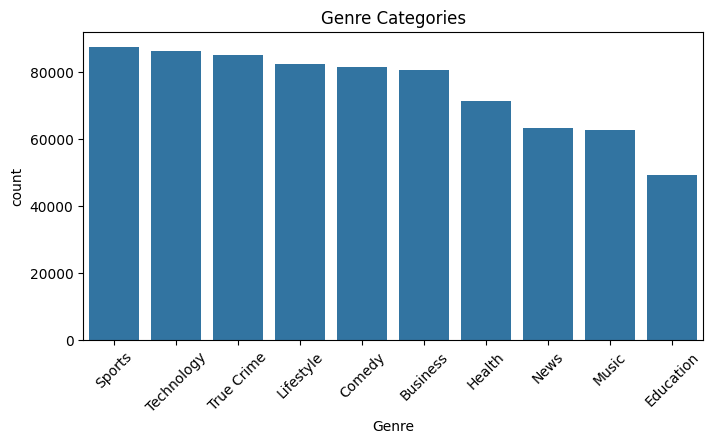

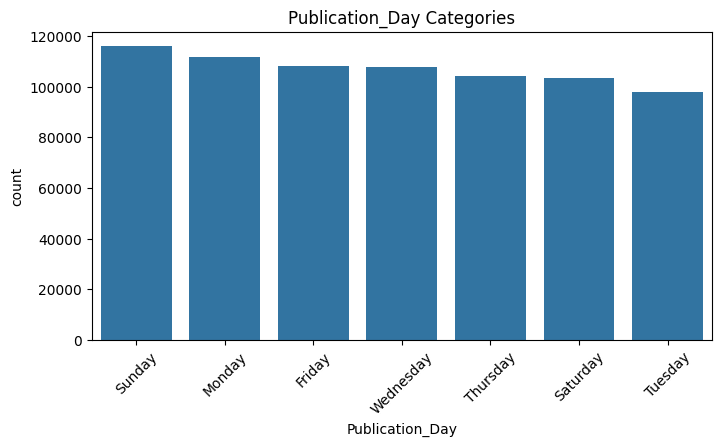

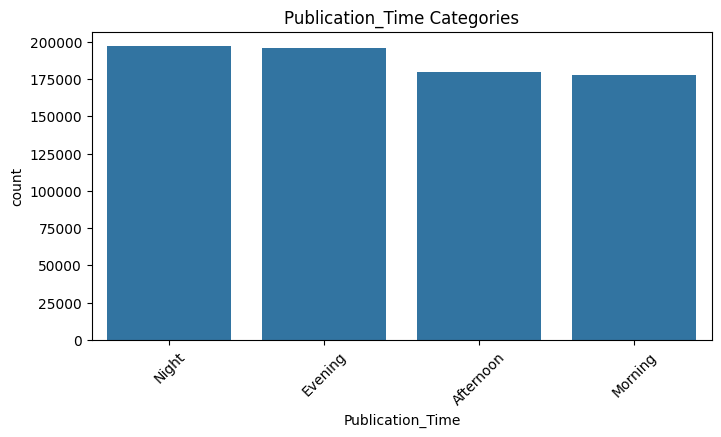

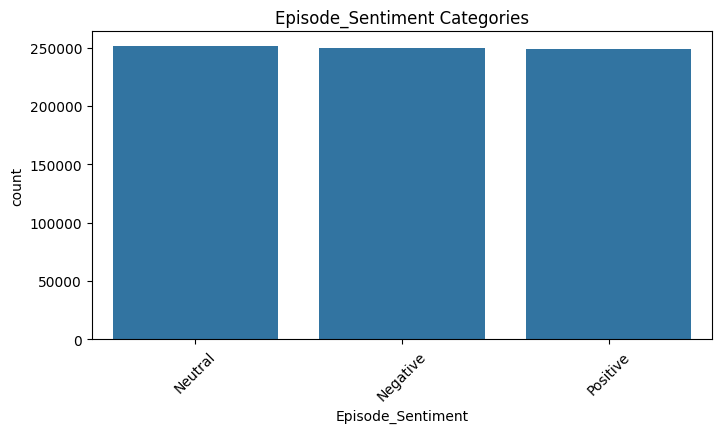

In [ ]:
categorical_cols = ['Genre',
                    'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().iloc[:10].index)
    plt.title(f"{col} Categories")
    plt.xticks(rotation=45)
    plt.show()


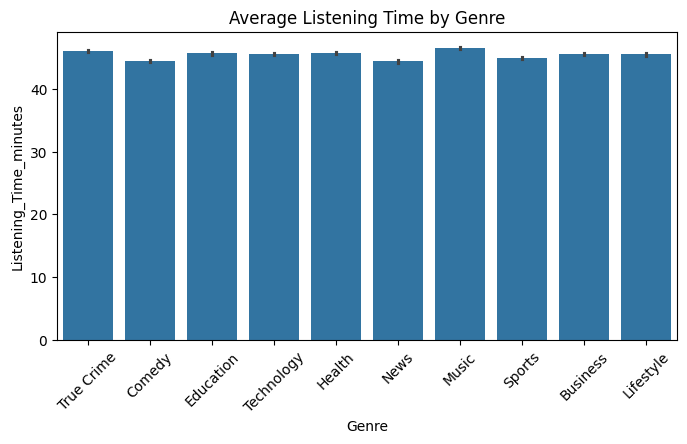

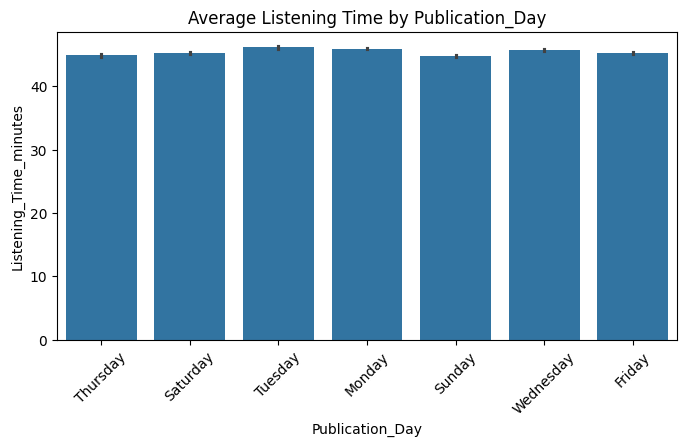

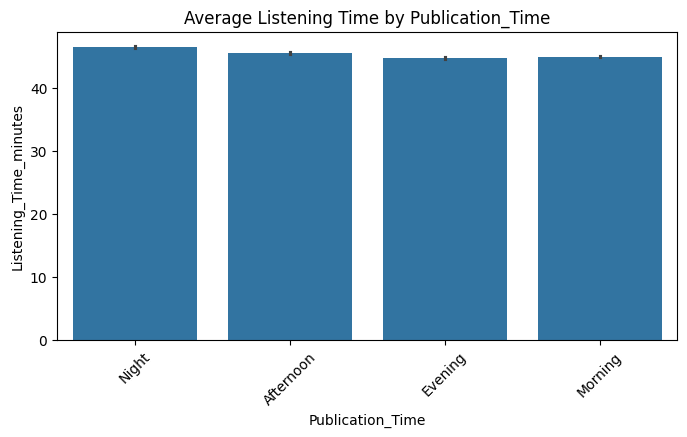

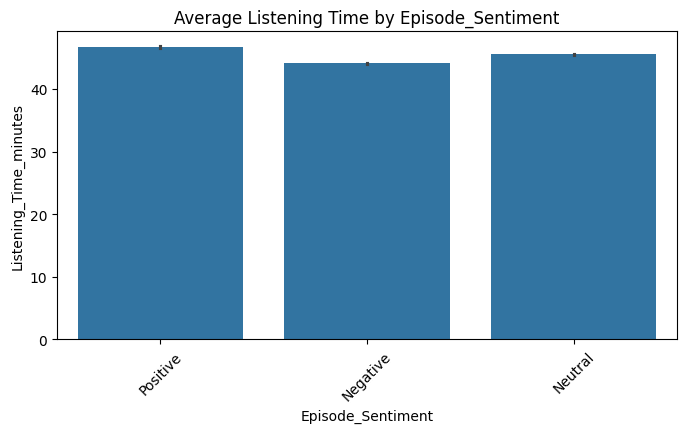

In [ ]:
#mean listening time by each categorical variable
for col in ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=train_df, x=col, y='Listening_Time_minutes', estimator='mean')
    plt.title(f"Average Listening Time by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Listening_Time_minutes")
    plt.xlabel(col)
    plt.show()


### Multicollinearity using Corrleation Heatmap

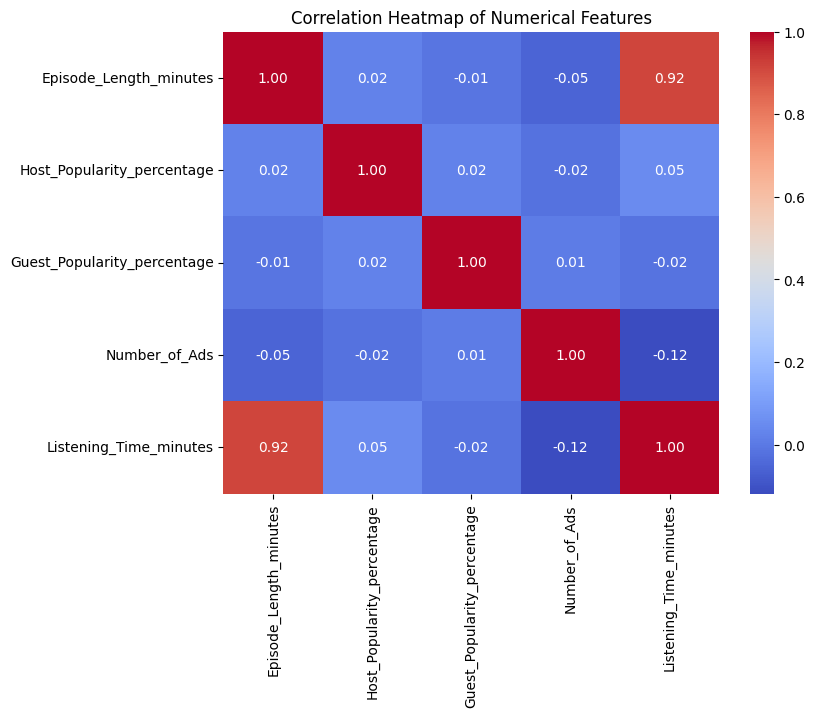

In [ ]:
#inspect multicollinearily between numerical features to inform preprocessing

num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage',
            'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']

plt.figure(figsize=(8, 6))
corr_matrix = train_df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Preprocessing

## Training Data Preparation

In [ ]:
#Preprocess Training Data


train_df_cleaned = train_df.copy()

#missing value imputation
train_df_cleaned['Episode_Length_minutes'] = train_df_cleaned['Episode_Length_minutes'].fillna(train_df_cleaned['Episode_Length_minutes'].median())
train_df_cleaned['Guest_Popularity_percentage'] = train_df_cleaned['Guest_Popularity_percentage'].fillna(train_df_cleaned['Guest_Popularity_percentage'].median())
train_df_cleaned['Number_of_Ads'] = train_df_cleaned['Number_of_Ads'].fillna(train_df_cleaned['Number_of_Ads'].mode()[0])

#clip outlier
train_df_cleaned['Episode_Length_minutes'] = np.clip(train_df_cleaned['Episode_Length_minutes'], None, 120)
train_df_cleaned['Host_Popularity_percentage'] = np.clip(train_df_cleaned['Host_Popularity_percentage'], 0, 100)
train_df_cleaned['Guest_Popularity_percentage'] = np.clip(train_df_cleaned['Guest_Popularity_percentage'], 0, 100)
train_df_cleaned['Number_of_Ads'] = np.clip(train_df_cleaned['Number_of_Ads'], None, 3)

#correct overflow in target
train_df_cleaned['Listening_Time_minutes'] = np.where(
    train_df_cleaned['Listening_Time_minutes'] > train_df_cleaned['Episode_Length_minutes'],
    train_df_cleaned['Episode_Length_minutes'],
    train_df_cleaned['Listening_Time_minutes']
)

In [ ]:
#Deal with Episode_Title/Podcast_Name
train_df_cleaned['Episode_Title_Numeric'] = train_df_cleaned['Episode_Title'].str.extract(r'(\d+)').astype(int)
train_df_cleaned.drop(columns=['Episode_Title', 'Podcast_Name'], inplace=True)


In [ ]:
train_df_cleaned.info()
train_df_cleaned.describe()
train_df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Length_minutes       750000 non-null  float64
 2   Genre                        750000 non-null  object 
 3   Host_Popularity_percentage   750000 non-null  float64
 4   Publication_Day              750000 non-null  object 
 5   Publication_Time             750000 non-null  object 
 6   Guest_Popularity_percentage  750000 non-null  float64
 7   Number_of_Ads                750000 non-null  float64
 8   Episode_Sentiment            750000 non-null  object 
 9   Listening_Time_minutes       750000 non-null  float64
 10  Episode_Title_Numeric        750000 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 62.9+ MB


,0
id,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0
Episode_Sentiment,0
Listening_Time_minutes,0


In [ ]:
#encoding block
sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
train_df_cleaned['Episode_Sentiment'] = train_df_cleaned['Episode_Sentiment'].map(sentiment_map)

train_df_cleaned = pd.get_dummies(
    train_df_cleaned,
    columns=['Genre', 'Publication_Day', 'Publication_Time'],
    drop_first=True
)

In [ ]:
train_df_cleaned.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Title_Numeric,Genre_Comedy,Genre_Education,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,0,63.84,74.81,53.58,0.0,2,31.41998,98,False,False,...,True,False,False,False,True,False,False,False,False,True
1,1,119.80,66.95,75.95,2.0,0,88.01241,26,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2,73.90,69.97,8.97,0.0,0,44.92531,16,False,True,...,False,False,False,False,False,True,False,True,False,False
3,3,67.17,57.22,78.70,2.0,2,46.27824,45,False,False,...,False,True,False,False,False,False,False,False,True,False
4,4,110.51,80.07,58.68,3.0,1,75.61031,86,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
bool_cols = train_df_cleaned.select_dtypes(include='bool').columns
train_df_cleaned[bool_cols] = train_df_cleaned[bool_cols].astype(int)

In [ ]:
train_df_cleaned.info()
train_df_cleaned.describe()
train_df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Length_minutes       750000 non-null  float64
 2   Host_Popularity_percentage   750000 non-null  float64
 3   Guest_Popularity_percentage  750000 non-null  float64
 4   Number_of_Ads                750000 non-null  float64
 5   Episode_Sentiment            750000 non-null  int64  
 6   Listening_Time_minutes       750000 non-null  float64
 7   Episode_Title_Numeric        750000 non-null  int64  
 8   Genre_Comedy                 750000 non-null  int64  
 9   Genre_Education              750000 non-null  int64  
 10  Genre_Health                 750000 non-null  int64  
 11  Genre_Lifestyle              750000 non-null  int64  
 12  Genre_Music                  750000 non-null  int64  
 13 

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Title_Numeric,Genre_Comedy,Genre_Education,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,0,63.84,74.81,53.58,0.0,2,31.41998,98,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,119.80,66.95,75.95,2.0,0,88.01241,26,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2,73.90,69.97,8.97,0.0,0,44.92531,16,0,1,...,0,0,0,0,0,1,0,1,0,0
3,3,67.17,57.22,78.70,2.0,2,46.27824,45,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4,110.51,80.07,58.68,3.0,1,75.61031,86,0,0,...,0,1,0,0,0,0,0,0,0,0


## Testing Data Preparation

In [ ]:

test_df_cleaned = test_df.copy()


test_df_cleaned['Episode_Length_minutes'] = test_df_cleaned['Episode_Length_minutes'].fillna(train_df['Episode_Length_minutes'].median())
test_df_cleaned['Guest_Popularity_percentage'] = test_df_cleaned['Guest_Popularity_percentage'].fillna(train_df['Guest_Popularity_percentage'].median())
test_df_cleaned['Number_of_Ads'] = test_df_cleaned['Number_of_Ads'].fillna(train_df['Number_of_Ads'].mode()[0])


test_df_cleaned['Episode_Length_minutes'] = np.clip(test_df_cleaned['Episode_Length_minutes'], None, 120)
test_df_cleaned['Host_Popularity_percentage'] = np.clip(test_df_cleaned['Host_Popularity_percentage'], 0, 100)
test_df_cleaned['Guest_Popularity_percentage'] = np.clip(test_df_cleaned['Guest_Popularity_percentage'], 0, 100)
test_df_cleaned['Number_of_Ads'] = np.clip(test_df_cleaned['Number_of_Ads'], None, 3)


test_df_cleaned['Episode_Title_Numeric'] = test_df_cleaned['Episode_Title'].str.extract(r'(\d+)').astype(int)
test_df_cleaned.drop(columns=['Podcast_Name', 'Episode_Title'], inplace=True)


sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
test_df_cleaned['Episode_Sentiment'] = test_df_cleaned['Episode_Sentiment'].map(sentiment_map)


test_df_cleaned = pd.get_dummies(
    test_df_cleaned,
    columns=['Genre', 'Publication_Day', 'Publication_Time'],
    drop_first=True
)
bool_cols = test_df_cleaned.select_dtypes(include='bool').columns
test_df_cleaned[bool_cols] = test_df_cleaned[bool_cols].astype(int)

#ensure columns match training set
for col in train_df_cleaned.columns:
    if col not in test_df_cleaned.columns and col != 'Listening_Time_minutes':
        test_df_cleaned[col] = 0

extra_cols = set(test_df_cleaned.columns) - set(train_df_cleaned.columns)
test_df_cleaned.drop(columns=extra_cols, inplace=True)

test_df_cleaned = test_df_cleaned[[col for col in train_df_cleaned.columns if col != 'Listening_Time_minutes']]

In [ ]:
test_df_cleaned.info()
test_df_cleaned.describe()
test_df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Episode_Length_minutes       250000 non-null  float64
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Guest_Popularity_percentage  250000 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Episode_Sentiment            250000 non-null  int64  
 6   Episode_Title_Numeric        250000 non-null  int64  
 7   Genre_Comedy                 250000 non-null  int64  
 8   Genre_Education              250000 non-null  int64  
 9   Genre_Health                 250000 non-null  int64  
 10  Genre_Lifestyle              250000 non-null  int64  
 11  Genre_Music                  250000 non-null  int64  
 12  Genre_News                   250000 non-null  int64  
 13 

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Episode_Title_Numeric,Genre_Comedy,Genre_Education,Genre_Health,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,750000,78.96,38.11,53.33,1.0,1,73,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,750001,27.87,71.29,53.58,0.0,1,23,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,750002,69.10,67.89,97.51,0.0,2,11,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,750003,115.39,23.40,51.75,2.0,2,73,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,750004,72.32,58.10,11.30,2.0,1,50,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Modeling


In [ ]:
# Separate features and target
X = train_df_cleaned.drop(columns=['id', 'Listening_Time_minutes']).values
Y = train_df_cleaned[['Listening_Time_minutes']].values

X.shape, Y.shape

((750000, 24), (750000, 1))

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, num_iterations=500):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.cost_history = []
        self.mean = None
        self.std = None

    def normalize(self, X, is_training=True):
        if is_training:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0) + 1e-7
        return (X - self.mean) / self.std

    def predict(self, X):
        num_examples = X.shape[0]
        X_transform = np.append(np.ones((num_examples, 1)), X, axis=1)
        X_normalized = self.normalize(X_transform[:, 1:], is_training=False)
        X_normalized = np.insert(X_normalized, 0, 1, axis=1)
        prediction = X_normalized.dot(self.W)
        return prediction

    def update_weights(self):
        num_examples = self.X.shape[0]
        X_transform = np.append(np.ones((num_examples, 1)), self.X, axis=1)
        X_normalized = self.normalize(X_transform[:, 1:], is_training=False)
        X_normalized = np.insert(X_normalized, 0, 1, axis=1)
        Y_pred = self.predict(self.X)
        dW = - (2 * X_normalized.T.dot(self.Y - Y_pred)) / num_examples
        cost = np.sqrt(np.mean(np.square(self.Y - Y_pred)))
        self.cost_history.append(cost)
        self.W = self.W - self.learning_rate * dW

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        _, num_features = X.shape
        self.W = np.zeros((num_features + 1, 1))

        _ = self.normalize(X, is_training=True)

        for _ in range(self.num_iterations):
            self.update_weights()
        return self



In [ ]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - ss_residual / ss_total

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def max_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def evaluate_model(model, X_train, y_train, X_eval, y_eval):
    y_train_pred = model.predict(X_train)
    y_eval_pred = model.predict(X_eval)

    def report(y_true, y_pred, label):
        print(f"{label} SET:")
        print(f"  MSE         = {mean_squared_error(y_true, y_pred):.4f}")
        print(f"  RMSE        = {root_mean_squared_error(y_true, y_pred):.4f}")
        print(f"  MAE         = {mean_absolute_error(y_true, y_pred):.4f}")
        print(f"  R²          = {r2_score(y_true, y_pred):.4f}")
        print(f"  Max Error   = {max_error(y_true, y_pred):.4f}")
        print(f"  Mean Error  = {mean_error(y_true, y_pred):.4f}")
        print()

    report(y_train, y_train_pred, "TRAIN")
    report(y_eval, y_eval_pred, "TEST")

    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].scatter(y_eval, y_eval_pred, alpha=0.3)
    axs[0].plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'r--', lw=2)
    axs[0].set_title('Actual vs Predicted (Test Set)')
    axs[0].set_xlabel('Actual')
    axs[0].set_ylabel('Predicted')
    axs[0].grid(True)

    residuals = y_eval - y_eval_pred
    axs[1].hist(residuals, bins=50, edgecolor='k', alpha=0.7)
    axs[1].set_title('Residuals Distribution (Test Set)')
    axs[1].set_xlabel('Residual')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
df_filtered = train_df_cleaned.drop(columns=['id', 'Episode_Title_Numeric'])

np.random.seed(50)
shuffled_indices = np.random.permutation(len(df_filtered))
split_index = int(len(df_filtered) * 0.8)
train_indices = shuffled_indices[:split_index]
eval_indices = shuffled_indices[split_index:]

feature_columns = [col for col in df_filtered.columns if col != 'Listening_Time_minutes']
X_all = df_filtered[feature_columns].values
Y_all = df_filtered[['Listening_Time_minutes']].values

X_train = X_all[train_indices]
y_train = Y_all[train_indices]
X_eval = X_all[eval_indices]
y_eval = Y_all[eval_indices]


In [ ]:
print(X_train.shape, y_train.shape)
print(X_eval.shape, y_eval.shape)

(600000, 23) (600000, 1)
(150000, 23) (150000, 1)


TRAIN SET:
  MSE         = 195.8690
  RMSE        = 13.9953
  MAE         = 10.7362
  R²          = 0.7239
  Max Error   = 51.8909
  Mean Error  = 5.9671

TEST SET:
  MSE         = 195.7126
  RMSE        = 13.9897
  MAE         = 10.7533
  R²          = 0.7225
  Max Error   = 58.2576
  Mean Error  = 6.0187



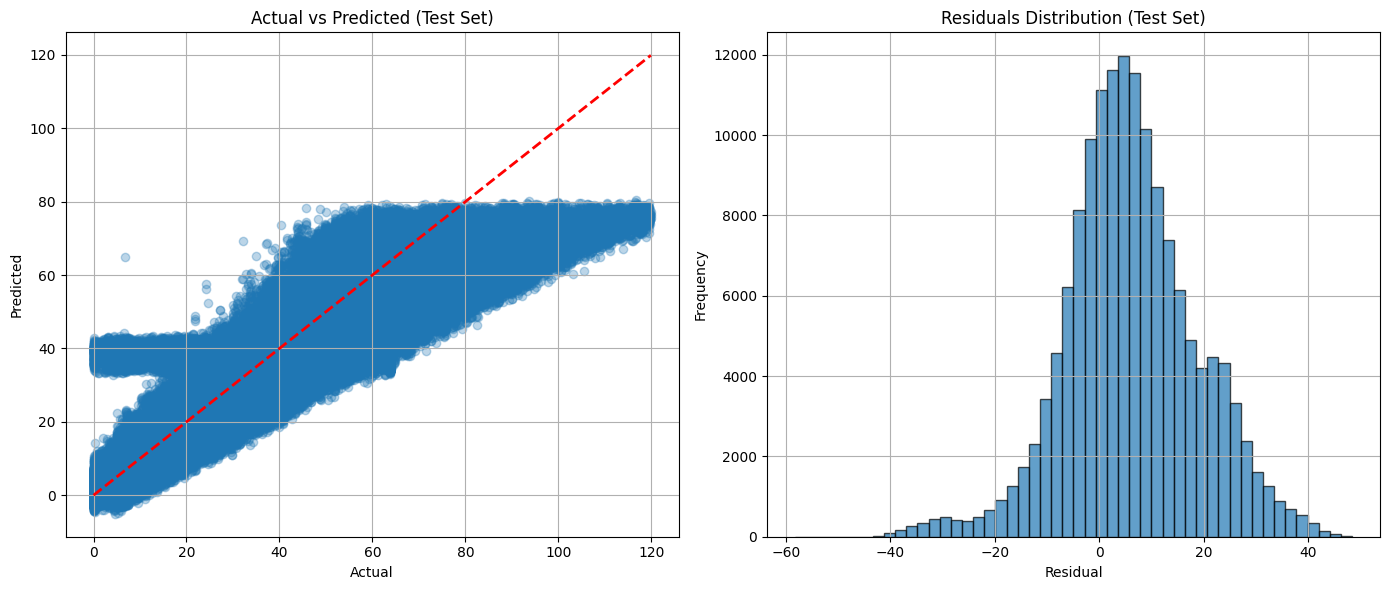

In [ ]:
linear_model = LinearRegression(learning_rate=0.01, num_iterations=100)
linear_model.fit(X_train, y_train)

evaluate_model(linear_model, X_train, y_train, X_eval, y_eval)

In [ ]:
feature_names = feature_columns

coefs = sk_model.coef_.flatten()
intercept = sk_model.intercept_.item() if hasattr(sk_model.intercept_, 'item') else sk_model.intercept_

weights = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})
weights['Abs_Coefficient'] = weights['Coefficient'].abs()
weights = weights.sort_values(by='Abs_Coefficient', ascending=False)

print(f"Intercept: {intercept:.4f}")
weights.head(40)


Intercept: -3.2714


,Feature,Coefficient,Abs_Coefficient
3,Number_of_Ads,-1.710238,1.710238
0,Episode_Length_minutes,0.754714,0.754714
4,Episode_Sentiment,0.469729,0.469729
12,Genre_Technology,0.462794,0.462794
13,Genre_True Crime,0.448007,0.448007
10,Genre_News,-0.442930,0.442930
11,Genre_Sports,-0.336214,0.336214
5,Genre_Comedy,-0.304472,0.304472
7,Genre_Health,-0.283043,0.283043
8,Genre_Lifestyle,-0.238420,0.238420


In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self, learning_rate, num_iterations, l2_penalty):
        self.l2_penalty = l2_penalty
        super().__init__(learning_rate, num_iterations)

    def update_weights(self):
        num_examples, _ = self.X.shape

        X_transform = np.append(np.ones((num_examples, 1)), self.X, axis=1)
        X_normalized = self.normalize(X_transform[:, 1:])
        X_normalized = np.insert(X_normalized, 0, 1, axis=1)

        Y_pred = self.predict(self.X)

        dW = - (2 * (X_normalized.T.dot(self.Y - Y_pred)) + 2 * self.l2_penalty * self.W) / num_examples
        cost = np.sqrt(np.mean((self.Y - Y_pred) ** 2))
        self.cost_history.append(cost)

        self.W = self.W - self.learning_rate * dW

        return self


TRAIN SET:
  MSE         = 195.1933
  RMSE        = 13.9712
  MAE         = 10.7181
  R²          = 0.7248
  Max Error   = 51.9680
  Mean Error  = 5.9224

TEST SET:
  MSE         = 195.0344
  RMSE        = 13.9655
  MAE         = 10.7351
  R²          = 0.7235
  Max Error   = 58.3335
  Mean Error  = 5.9740



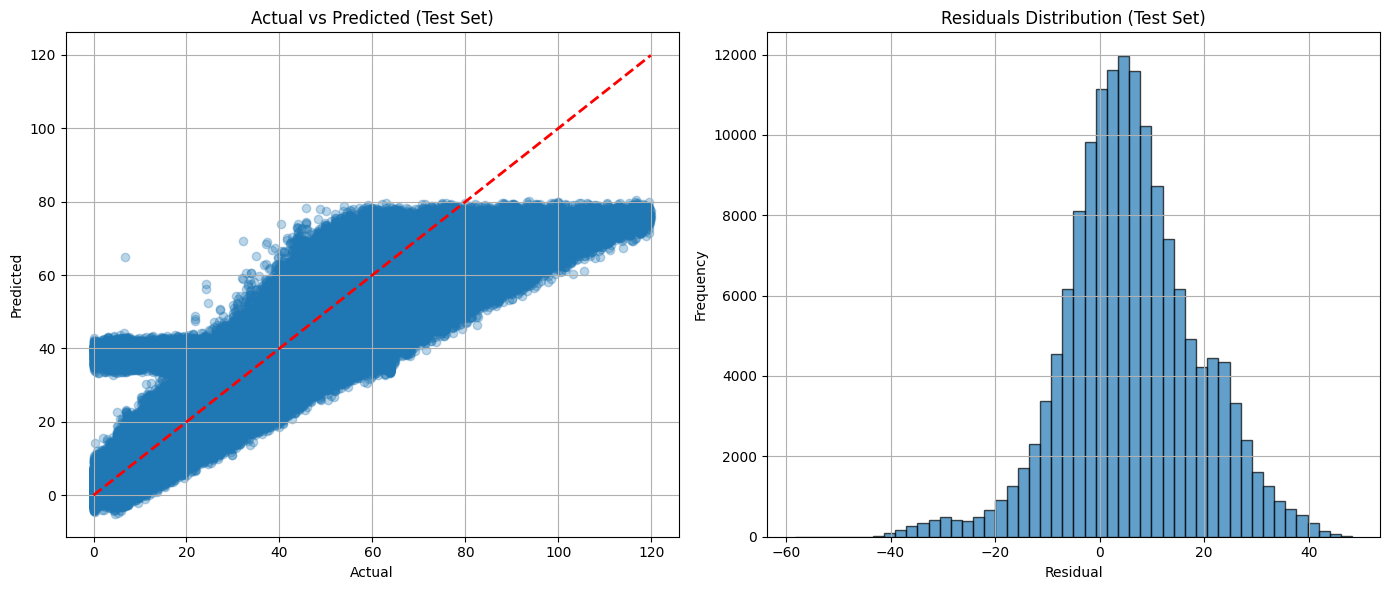

In [ ]:
# Reuse df_filtered, X_train, y_train, X_eval, y_eval from earlier steps

# Train Ridge Regression
ridge_model = RidgeRegression(learning_rate=0.01, num_iterations=100, l2_penalty=1000)
ridge_model.fit(X_train, y_train)

# evaluate Ridge model
evaluate_model(ridge_model, X_train, y_train, X_eval, y_eval)


In [ ]:
from numpy.linalg import norm

w_linear = model.W
w_ridge = ridge_model.W

print("||w_linear||:", norm(w_linear))
print("||w_ridge ||:", norm(w_ridge))

||w_linear||: 44.04843848568884
||w_ridge ||: 44.098929438452416


In [ ]:
import numpy as np
import itertools

class PolynomialRegression(LinearRegression):
    def __init__(self, degree, learning_rate, num_iterations):
        self.degree = degree
        super().__init__(learning_rate, num_iterations)

    def transform(self, X):
        if X.ndim == 1:
            X = X[:, np.newaxis]
        num_examples, num_features = X.shape
        features = [np.ones((num_examples, 1))]

        for j in range(1, self.degree + 1):
            for combination in itertools.combinations_with_replacement(range(num_features), j):
                feature = np.ones(num_examples)
                for index in combination:
                    feature *= X[:, index]
                features.append(feature[:, np.newaxis])

        return np.concatenate(features, axis=1)

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

        X_poly = self.transform(X)
        X_poly_normalized = X_poly.copy()

        if X_poly.shape[1] > 1:
            X_poly_normalized[:, 1:] = self.normalize(X_poly_normalized[:, 1:])

        num_examples, num_features = X_poly_normalized.shape
        self.W = np.zeros((num_features, 1))

        for _ in range(self.num_iterations):
            Y_pred = X_poly_normalized.dot(self.W)
            dW = -(2 / num_examples) * X_poly_normalized.T.dot(self.Y - Y_pred)
            self.W -= self.learning_rate * dW
            cost = np.sqrt(np.mean((self.Y - Y_pred) ** 2))
            self.cost_history.append(cost)

        return self

    def predict(self, X):
        X_poly = self.transform(X)
        if X_poly.shape[1] > 1:
            X_poly[:, 1:] = self.normalize(X_poly[:, 1:])
        return X_poly.dot(self.W)


In [ ]:
poly_model = PolynomialRegression(degree=2, learning_rate=0.01, num_iterations=100)
poly_model.fit(X_train, y_train)

evaluate_model(poly_model, X_train, y_train, X_eval, y_eval)


TRAIN SET:
  MSE         = 150.6677
  RMSE        = 12.2747
  MAE         = 9.3856
  R²          = 0.7876
  Max Error   = 62.2707
  Mean Error  = 0.0000

TEST SET:
  MSE         = 150.0611
  RMSE        = 12.2499
  MAE         = 9.3791
  R²          = 0.7872
  Max Error   = 69.2066
  Mean Error  = 0.0560



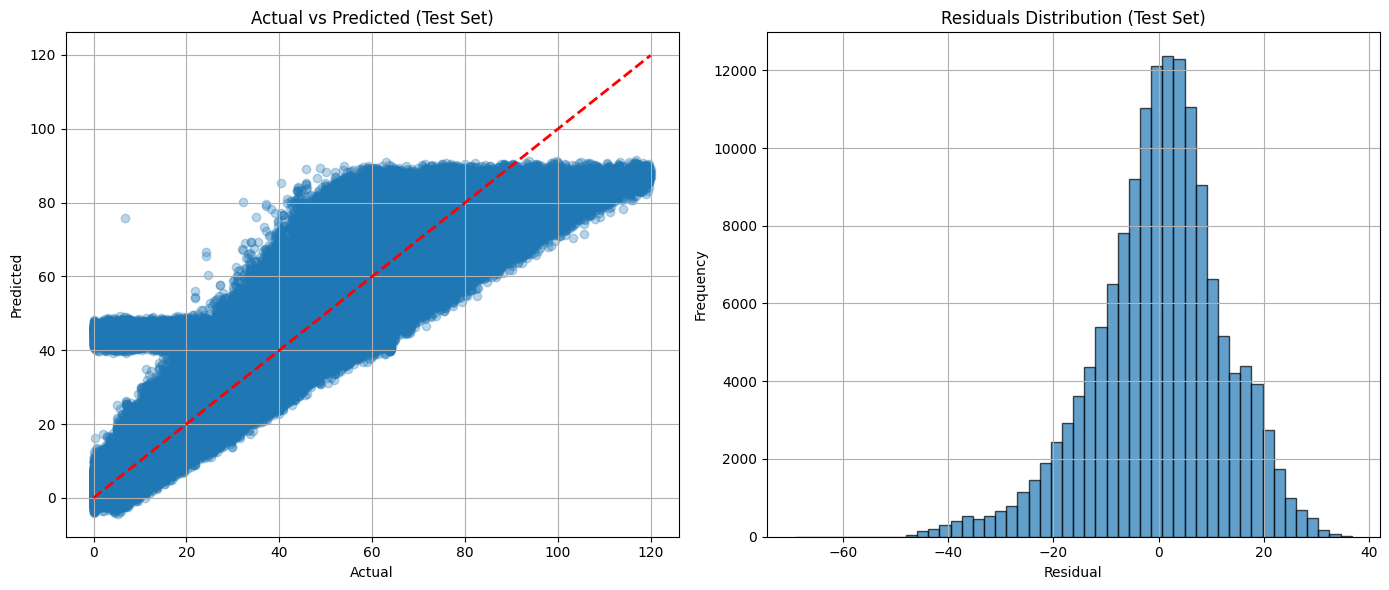

In [ ]:
# SANITY CHECK USING SKLEARN

from sklearn.linear_model import LinearRegression as SklearnLinearRegression

sk_model = SklearnLinearRegression()
sk_model.fit(X_train, y_train)

class SKModelWrapper:
    def __init__(self, model):
        self.model = model
        self.cost_history = []  # not used, but needed for compatibility

    def predict(self, X):
        return self.model.predict(X)

evaluate_model(SKModelWrapper(sk_model), X_train, y_train, X_eval, y_eval)


In [ ]:
# SANITY CHECK USING TORCH

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

# convert data to float32 and normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float32)
X_eval_scaled = scaler.transform(X_eval).astype(np.float32)
y_train_tensor = y_train.astype(np.float32)
y_eval_tensor = y_eval.astype(np.float32)

# convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_scaled)
X_eval_tensor = torch.from_numpy(X_eval_scaled)
y_train_tensor = torch.from_numpy(y_train_tensor)
y_eval_tensor = torch.from_numpy(y_eval_tensor)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
eval_ds = TensorDataset(X_eval_tensor, y_eval_tensor)
train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True)
eval_loader = DataLoader(eval_ds, batch_size=1024)

class ListeningTimeModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = ListeningTimeModel(X_train.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb).squeeze()
        loss = criterion(preds, yb.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1:02d} | Train Loss: {running_loss / len(train_loader):.4f}")


Epoch 01 | Train Loss: 625.6646
Epoch 02 | Train Loss: 155.7319
Epoch 03 | Train Loss: 150.7561
Epoch 04 | Train Loss: 148.8836
Epoch 05 | Train Loss: 148.2790
Epoch 06 | Train Loss: 147.9681
Epoch 07 | Train Loss: 147.7603
Epoch 08 | Train Loss: 147.5748
Epoch 09 | Train Loss: 147.4859
Epoch 10 | Train Loss: 147.4121
Epoch 11 | Train Loss: 147.2950
Epoch 12 | Train Loss: 147.2157
Epoch 13 | Train Loss: 147.1572
Epoch 14 | Train Loss: 147.0668
Epoch 15 | Train Loss: 146.9817
Epoch 16 | Train Loss: 146.9500
Epoch 17 | Train Loss: 146.8826
Epoch 18 | Train Loss: 146.8294
Epoch 19 | Train Loss: 146.7781
Epoch 20 | Train Loss: 146.7054


TRAIN SET:
  MSE         = 146.5222
  RMSE        = 12.1046
  MAE         = 9.2450
  R²          = 0.7934
  Max Error   = 62.7682
  Mean Error  = -0.1018

TEST SET:
  MSE         = 146.6401
  RMSE        = 12.1095
  MAE         = 9.2656
  R²          = 0.7921
  Max Error   = 68.1107
  Mean Error  = -0.0394



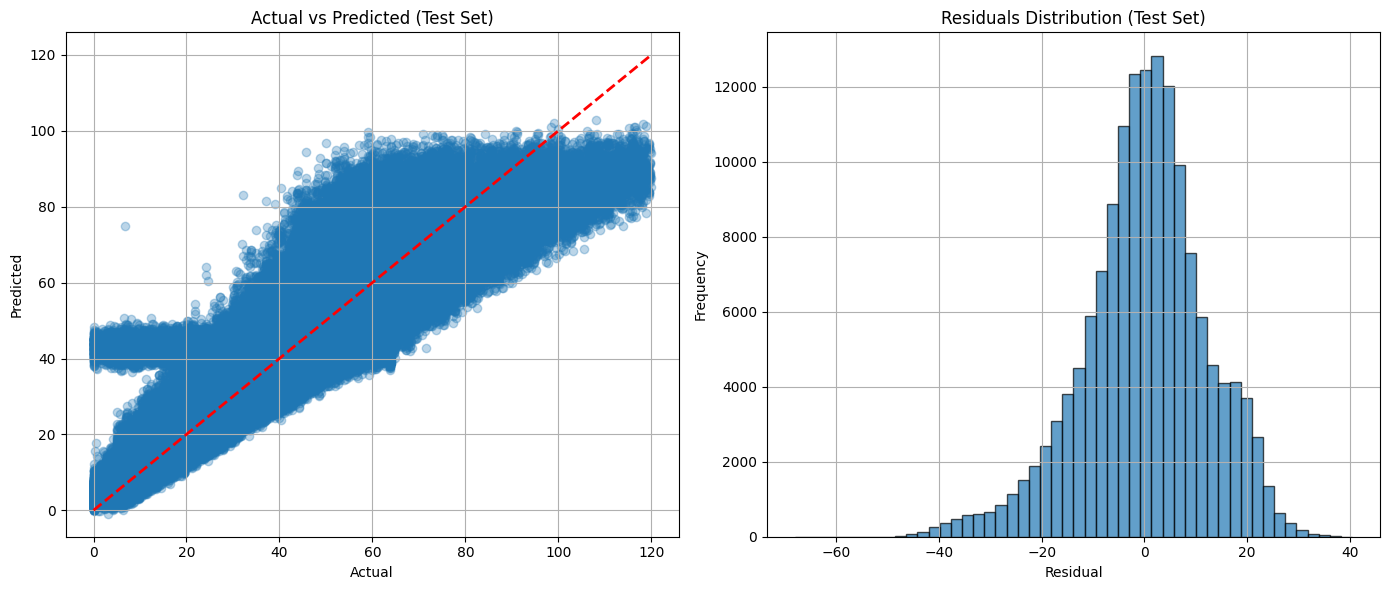

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).squeeze().numpy()
    y_pred_eval = model(X_eval_tensor).squeeze().numpy()

evaluate_model(
    model=type('Wrapper', (), {'predict': lambda self, x: model(torch.from_numpy(scaler.transform(x).astype(np.float32))).detach().numpy(), 'cost_history': []})(),
    X_train=X_train,
    y_train=y_train,
    X_eval=X_eval,
    y_eval=y_eval
)
